In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
from numpy.random import normal

import matplotlib.pyplot as plt

%aimport src.enkf
%aimport src.problem
%aimport src.plots

%matplotlib inline

np.random.seed(42)

# Gaussian Processes

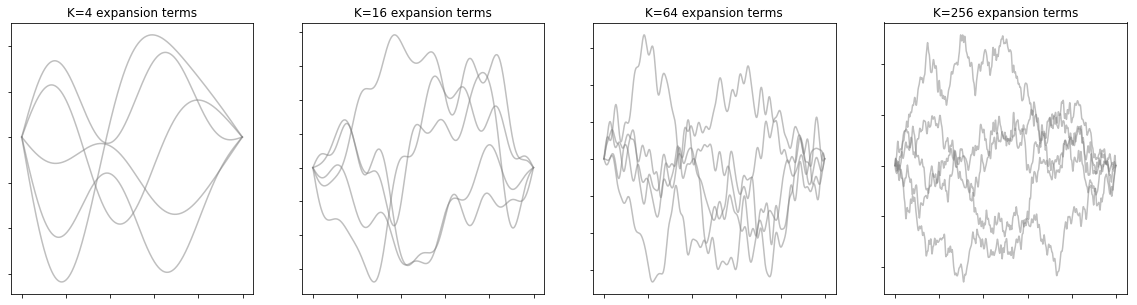

In [2]:
src.plots.plot_gps([4, 16, 64, 256])

# Preparing our problem

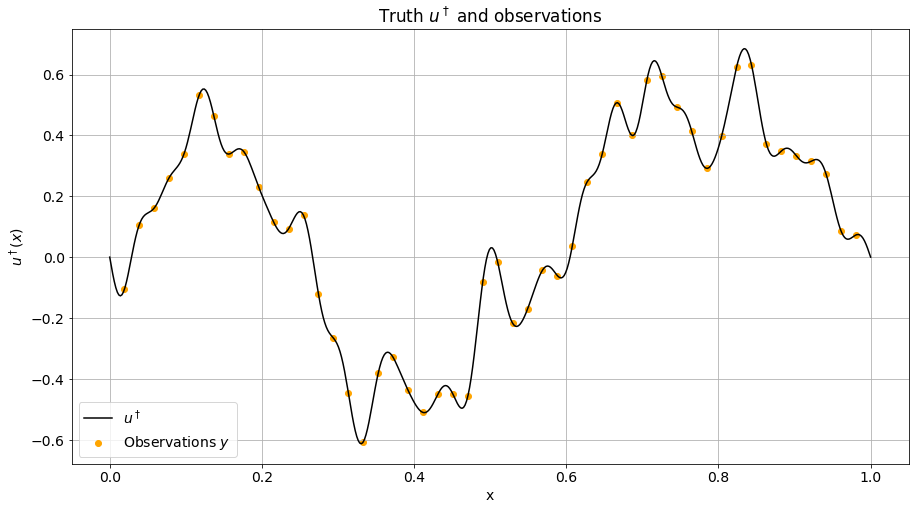

In [63]:
n_terms = 50
n_measurements = 52
error_std = 1e-1

measurement_points = np.linspace(0, 1.0-2.0/n_measurements, n_measurements-2) + 1.0/n_measurements
g, u_true, y = src.problem.prep_problem(n_terms, measurement_points, 0)

src.plots.plot_truth(u_true, measurement_points, y)

# Running the continuous EnKF

In [ ]:
enkf = src.enkf.ContEnKF({
    'initial_ensemble': src.problem.make_initial_ensemble(5, mixed=True),
    'data': y,
    'model': g,
    'noise_var': error_std**2,
    'integrate_until': 1e0,
    'step_size': 5e-3
})

enkf.compute();

In [ ]:
src.plots.plot_animation(enkf, u_true, [0, 1])

In [ ]:
src.plots.plot_enkf_vs_truth(enkf, u_true, measurement_points, y)

# Convergence analysis

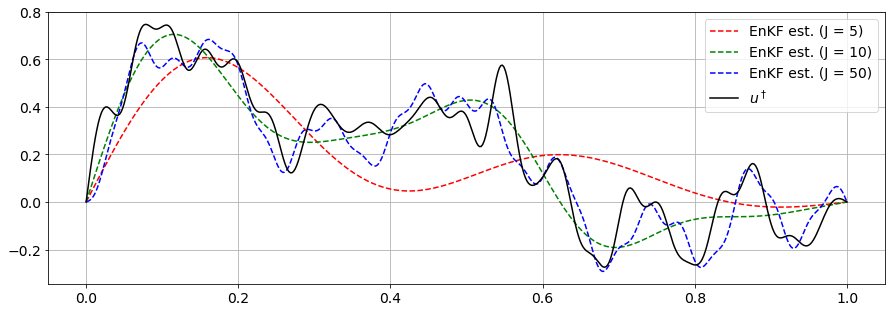

In [57]:
enkf5 = src.enkf.ContEnKF({
    'initial_ensemble': src.problem.make_initial_ensemble(5),
    'data': y,
    'model': g,
    'noise_var': error_std**2,
    'integrate_until': 1e8,
    'step_size': 5e3
})

enkf10 = src.enkf.ContEnKF({
    'initial_ensemble': src.problem.make_initial_ensemble(10),
    'data': y,
    'model': g,
    'noise_var': error_std**2,
    'integrate_until': 1e8,
    'step_size': 5e3
})

enkf50 = src.enkf.ContEnKF({
    'initial_ensemble': src.problem.make_initial_ensemble(50),
    'data': y,
    'model': g,
    'noise_var': error_std**2,
    'integrate_until': 1e8,
    'step_size': 5e3
})

enkf5.compute()
enkf10.compute()
enkf50.compute()

src.plots.plot_multi_enkf_vs_truth([enkf5, enkf10, enkf50], u_true, ['red', 'green', 'blue'])

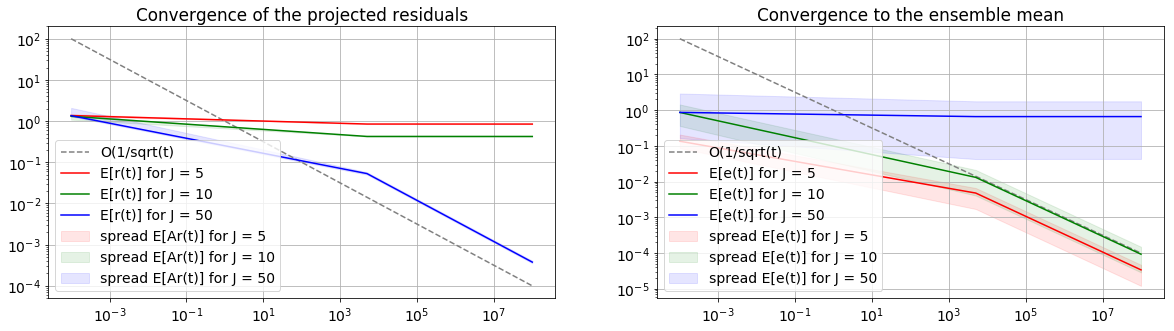

In [59]:
src.plots.plot_multi_convergence([enkf5, enkf10, enkf50], g, y, ['red', 'green', 'blue'])

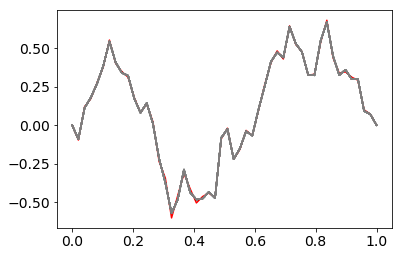

In [64]:

enkf50 = src.enkf.ContEnKF({
    'initial_ensemble': src.problem.make_initial_ensemble(50),
    'data': y,
    'model': g,
    'noise_var': error_std**2,
    'integrate_until': 1e8,
    'step_size': 5e3
})

enkf50.compute()

x = np.linspace(0, 1)
plt.plot(x, src.problem.eval_gp(u_true, x), c='red')
for i in range(50):
    plt.plot(x, src.problem.eval_gp(enkf50.path[-1,i,:], x), c='grey', alpha=0.3)


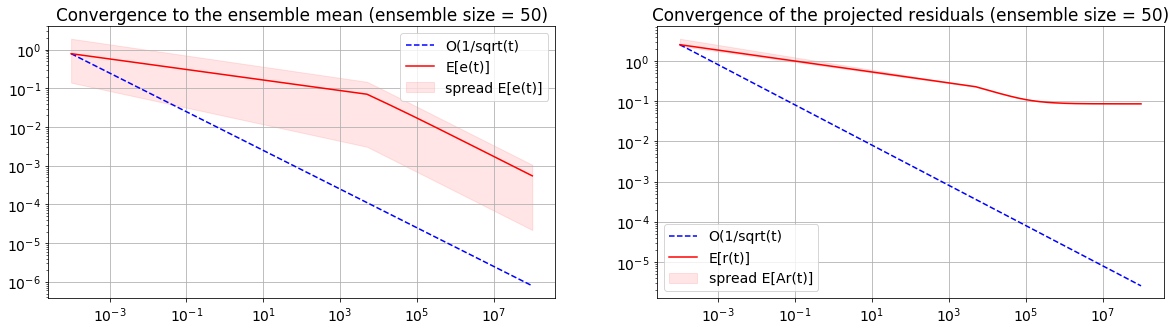

In [65]:
src.plots.plot_convergence(enkf50, g, y)